# "Who's the author of this paper?": A Data Literacy Project

This project aims to show that we can recognize an author based on their writing style. To do so we collect features like word frequencies, sentence lenght statistics and syllable counts and generate a joint distribution over these features and the authors. This can then be used to predict what author wrote an paper that has not been seen before.

## Setup

In [1]:
import src.analysis as analysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
root_folders = ["./data/mini-datasets/top8_authors/", 
                "./data/mini-datasets/top8_cat/",  
                "./data/mini-datasets/top8_country/", 
                "./data/mini-datasets/top8_venue/", 
                "./data/mini-datasets/top8_year/"]

## General Performance Evaluation

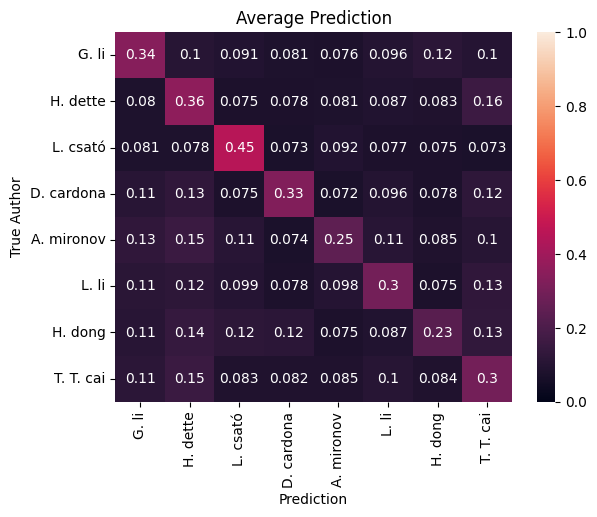

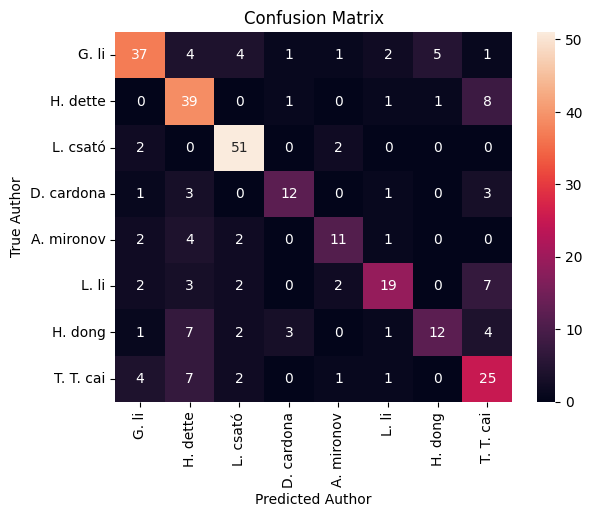

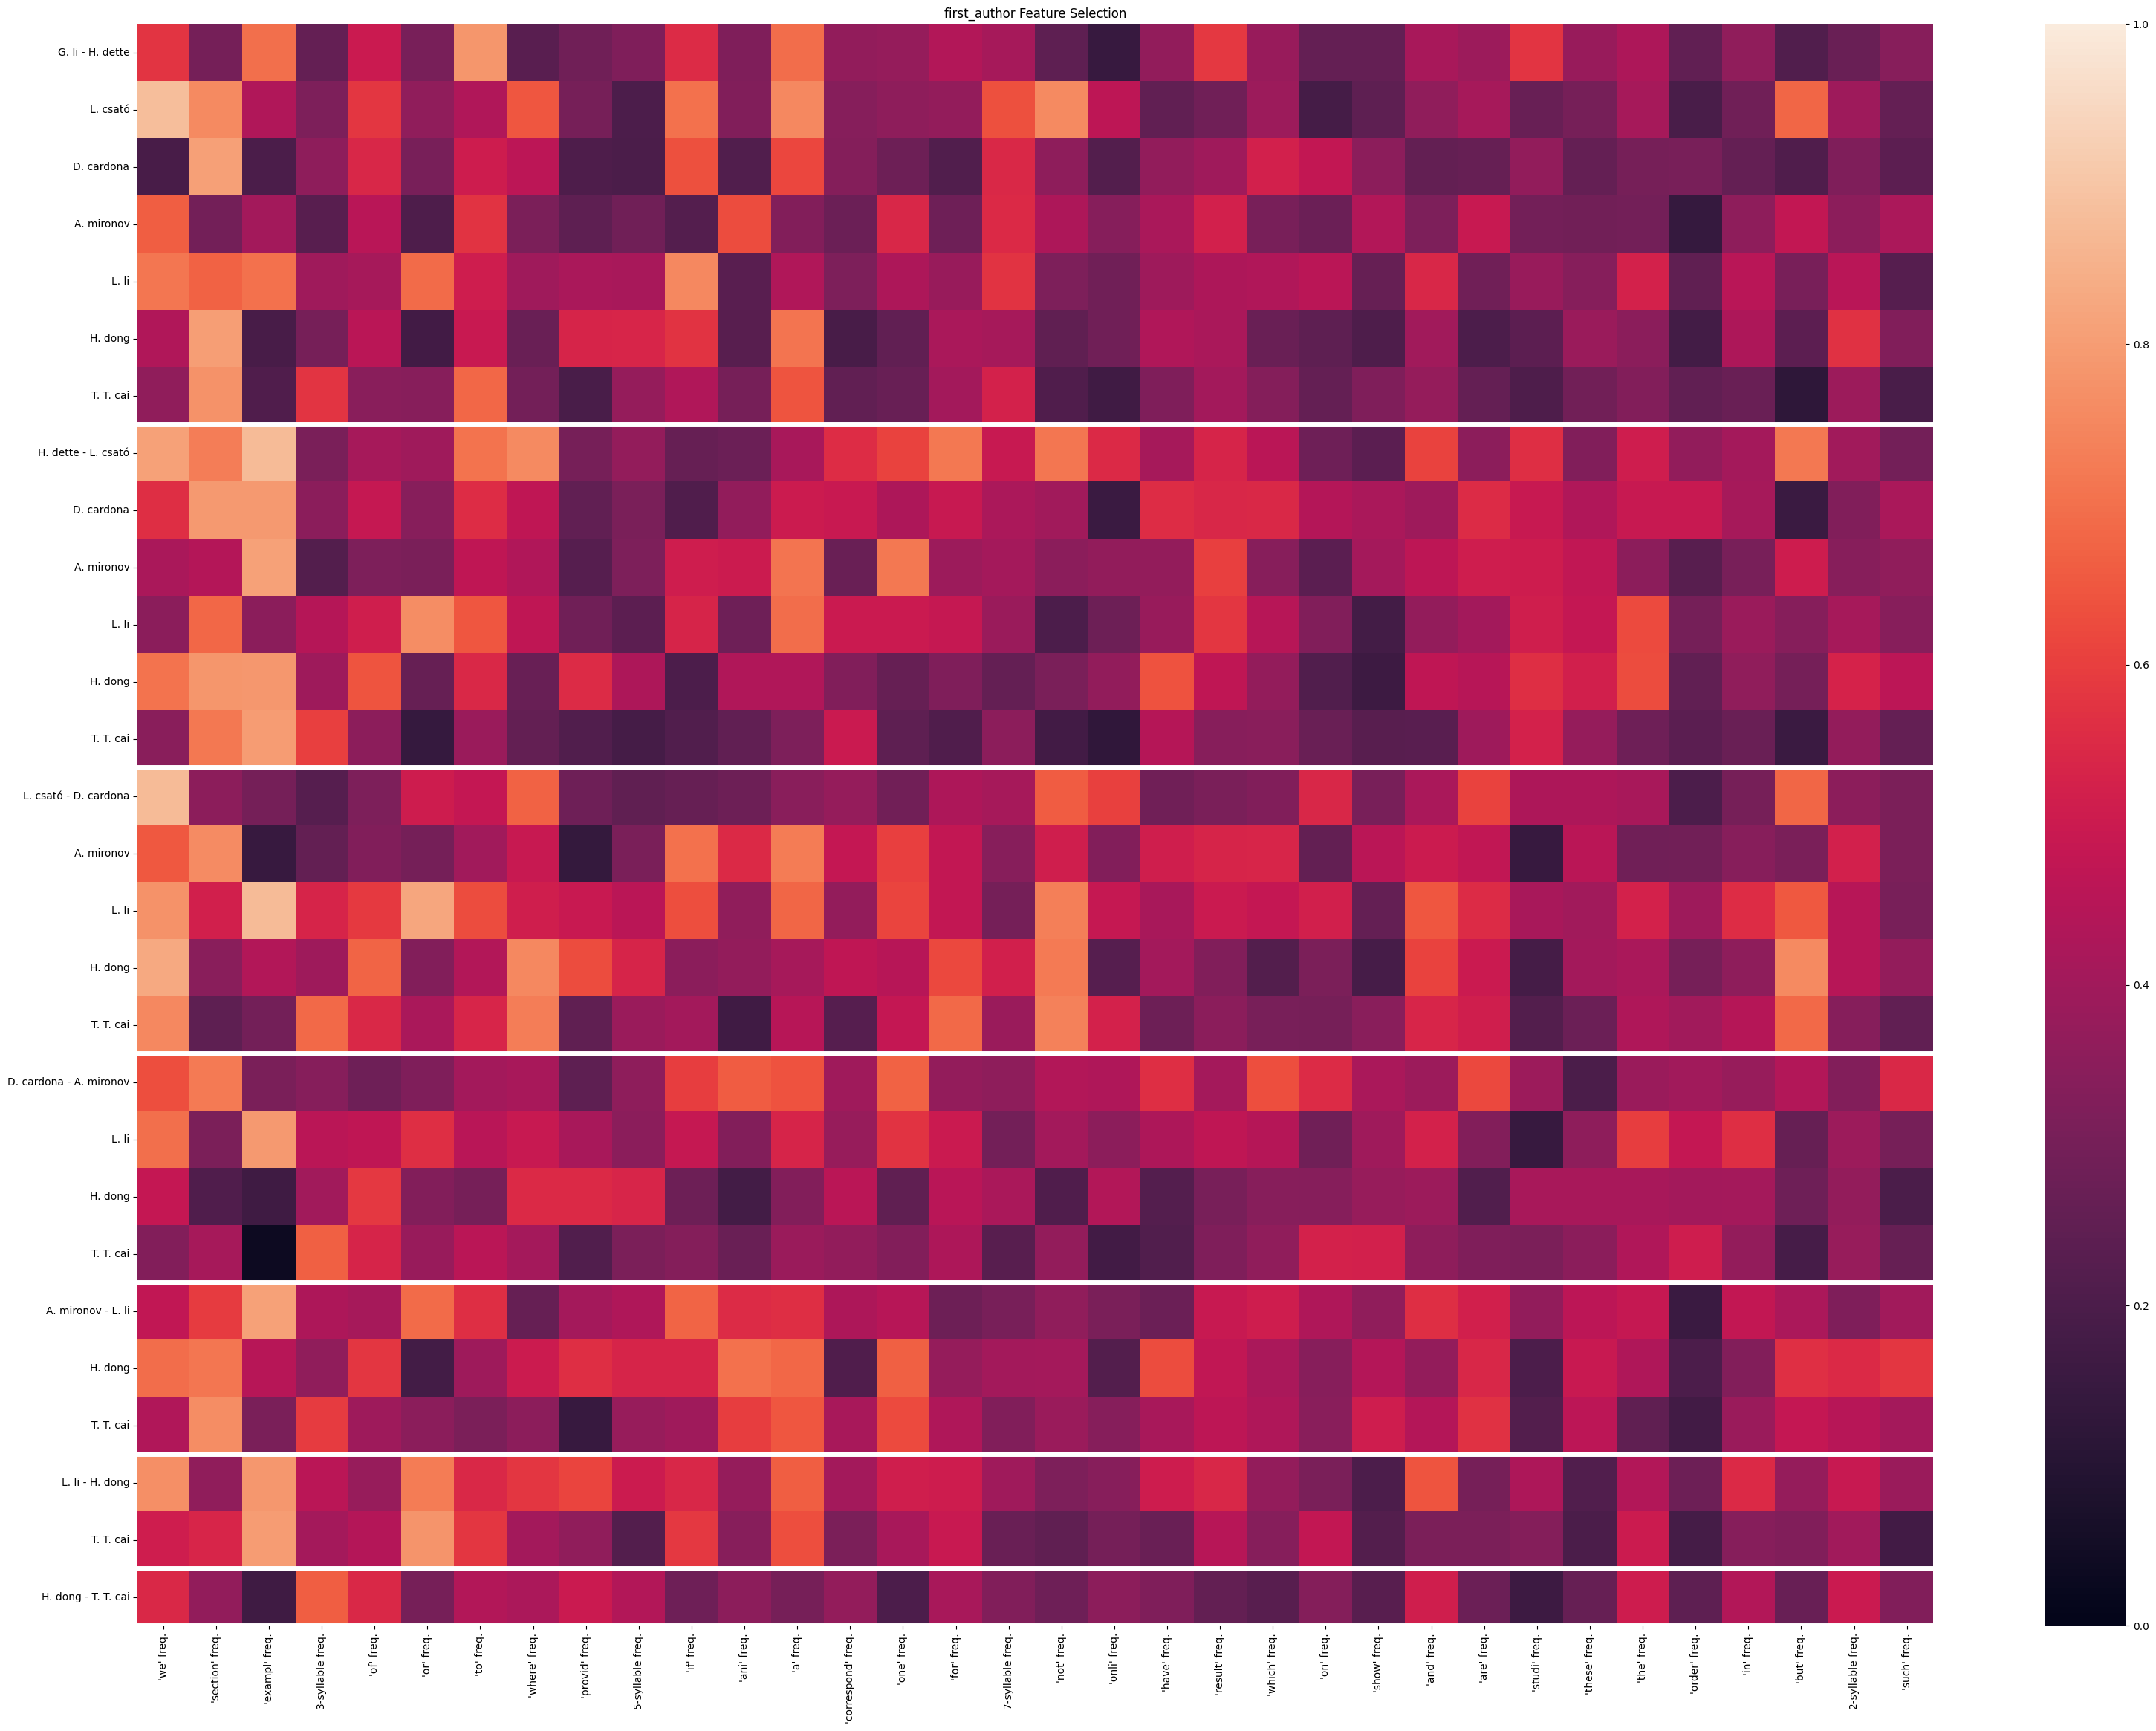

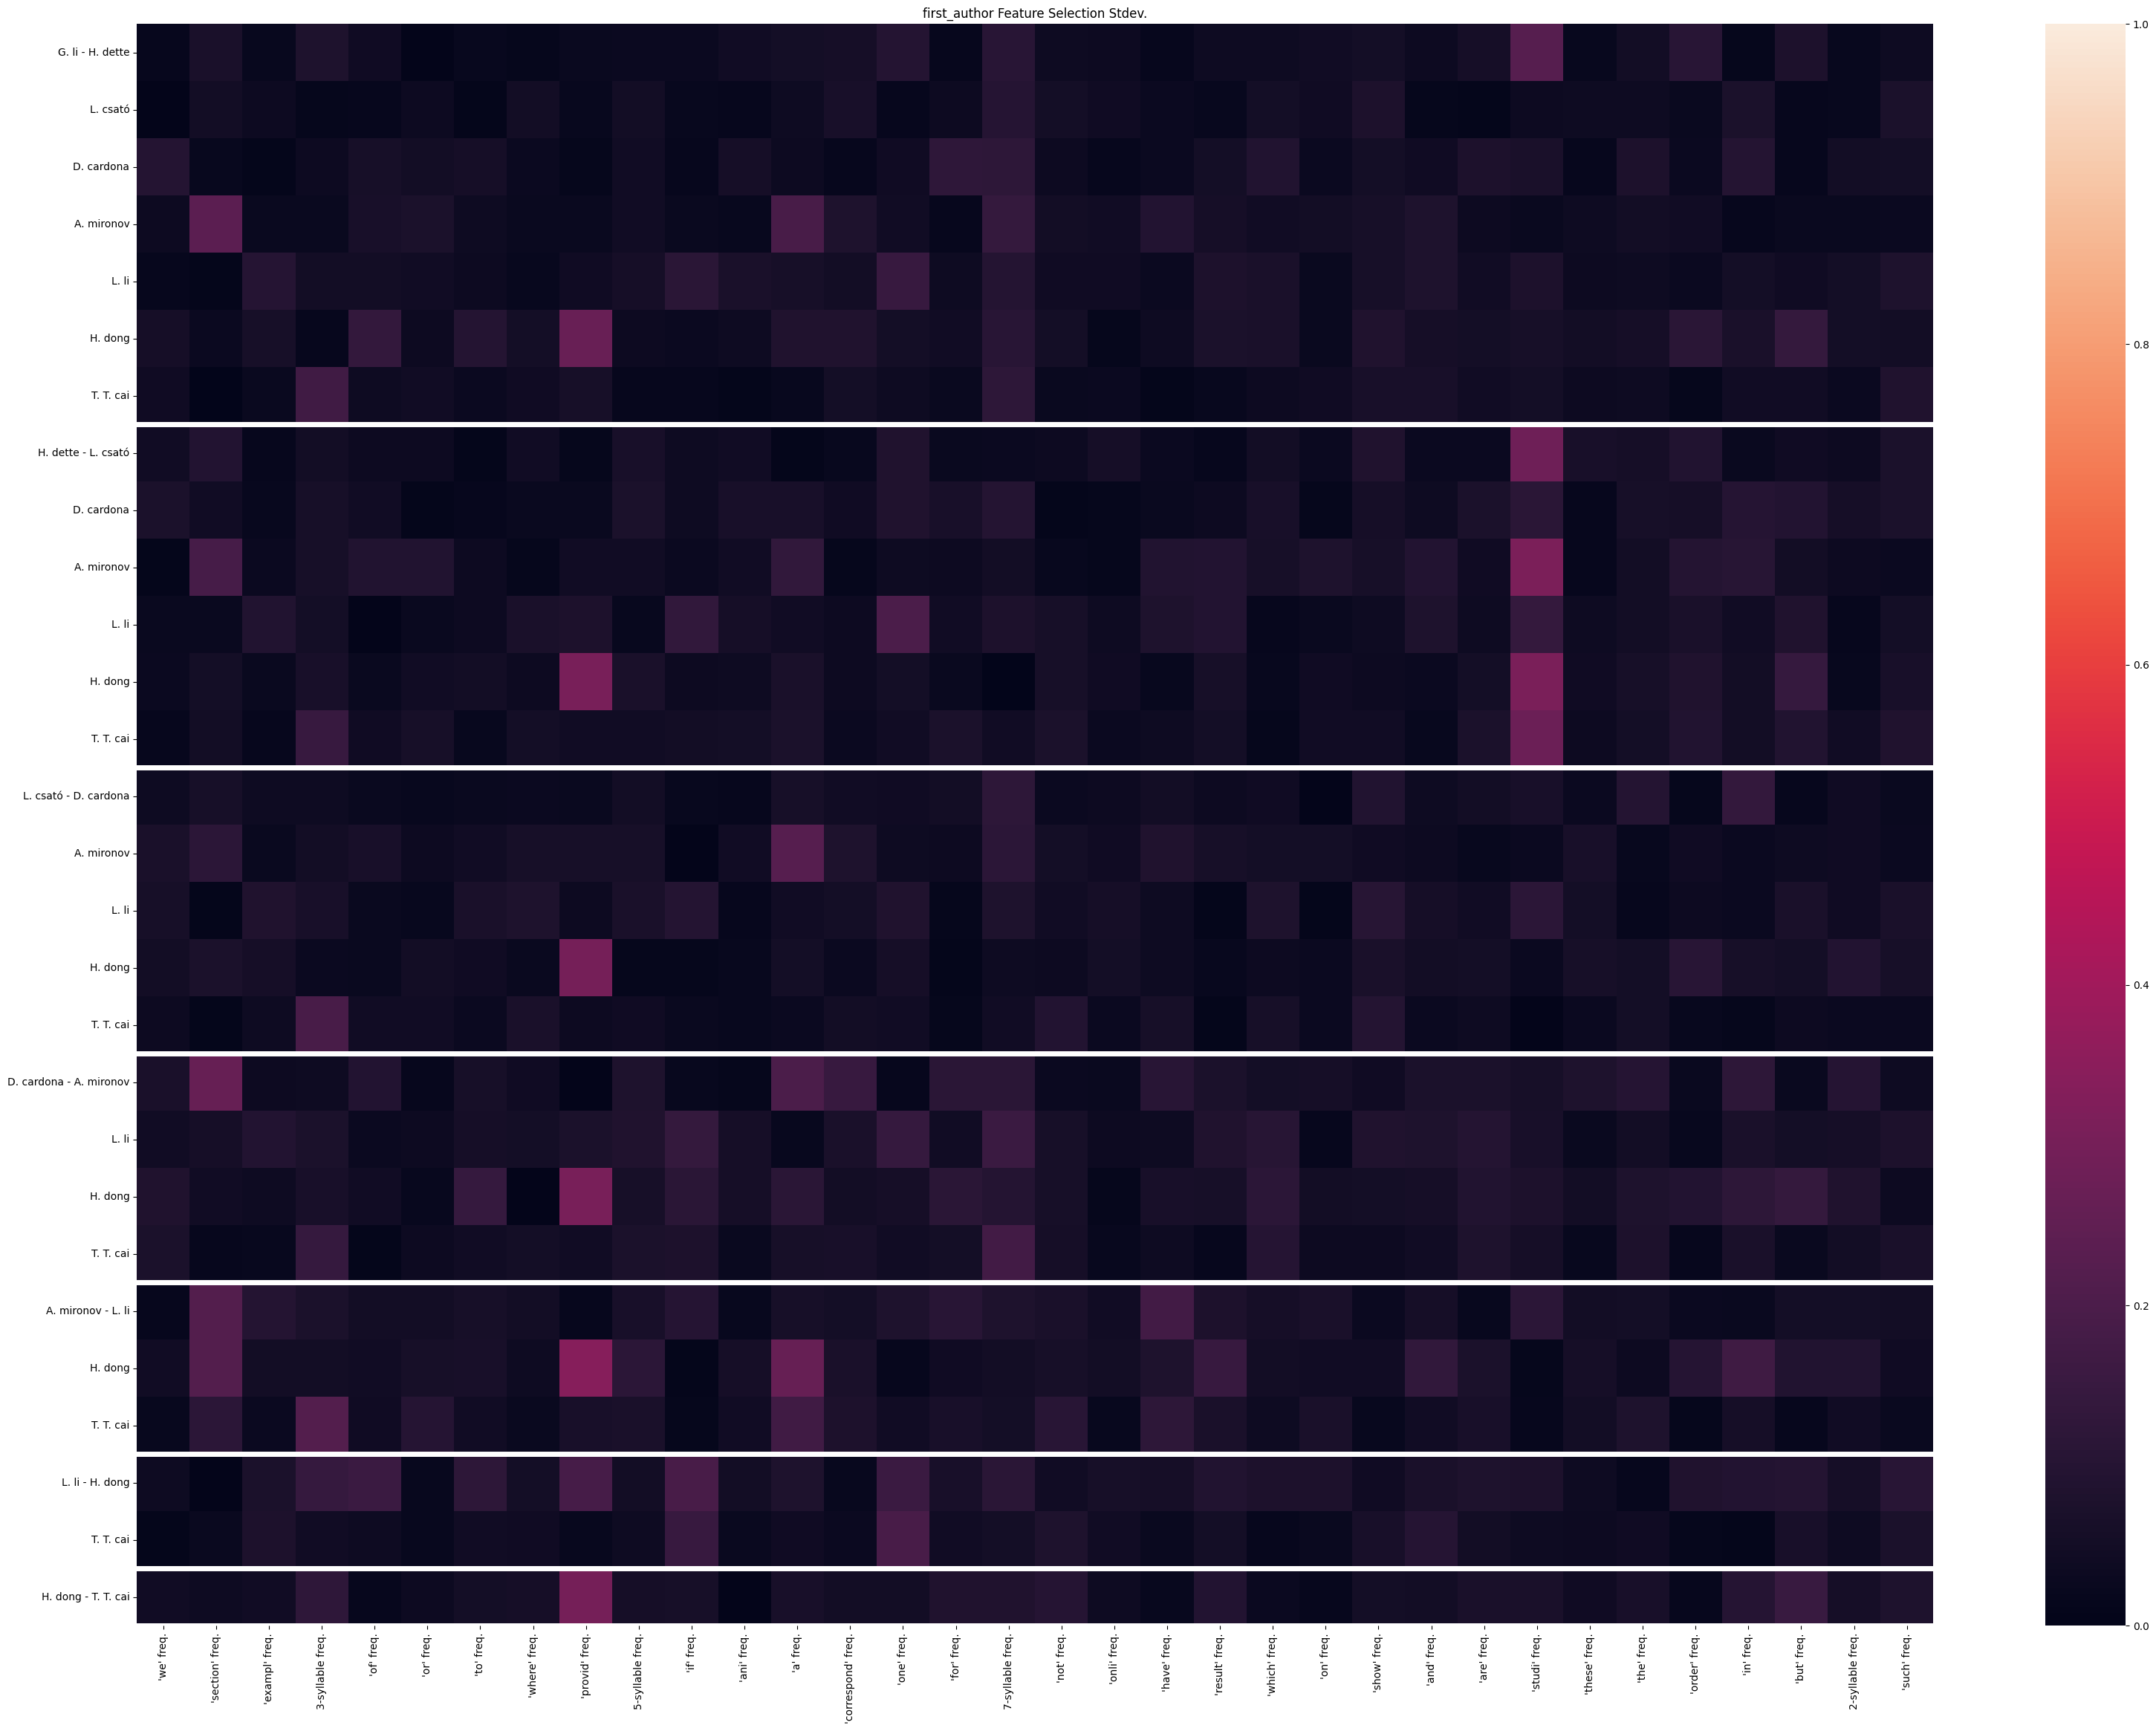

In [4]:
(predictions_general_34, 
 performances_general_34, 
 feature_selection_ratios_general_34, 
 feature_selection_dfs_general_34, 
 feature_selection_stdev_dfs_general_34,
 balanced_precisions_34) = analysis.pipeline_wrapper(root_folders[0], feature_select_nums=[34], show_graphics=True)

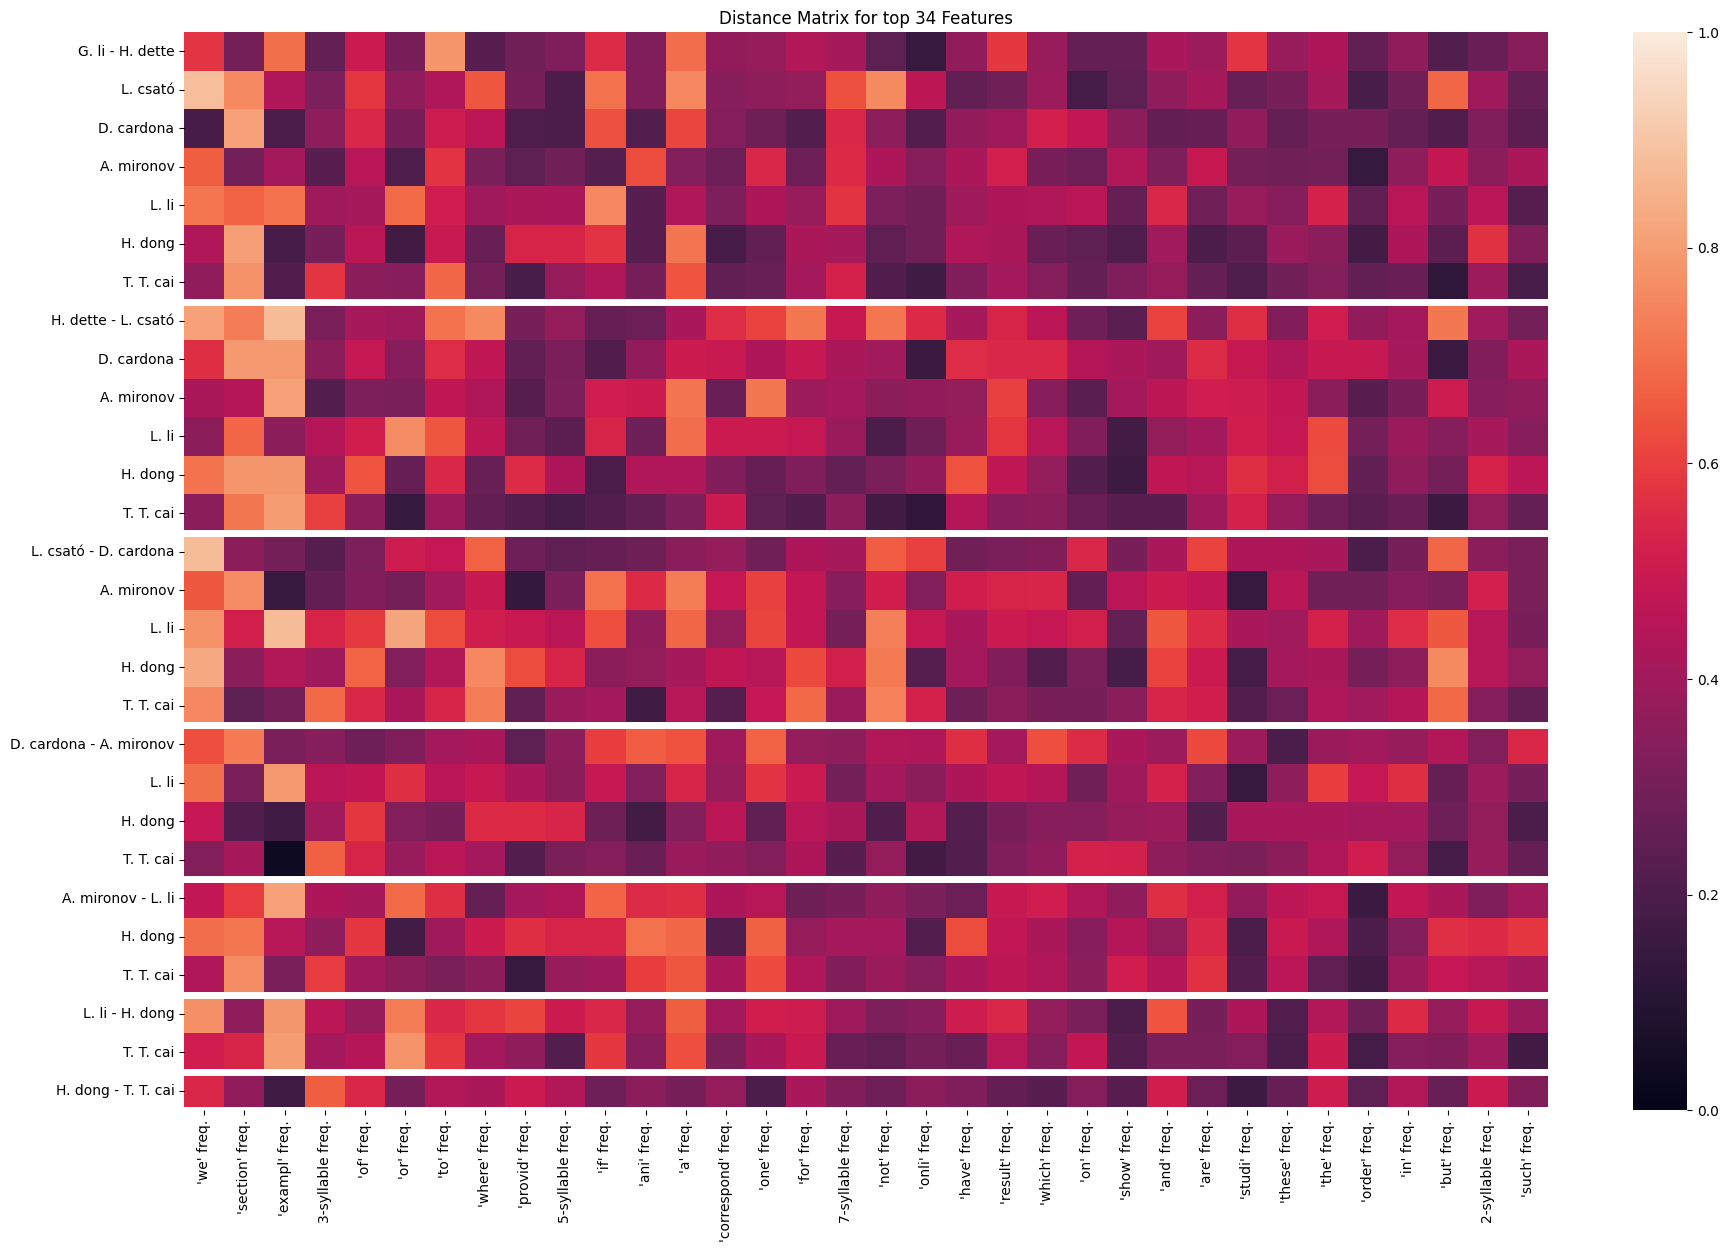

In [49]:
from src.plotting import visualize_multiindex_df

feature_selection_df = feature_selection_dfs_general_34[34]["first_author"]
visualize_multiindex_df(data_df=feature_selection_df, 
                        title="Distance Matrix for top 34 Features", 
                        save_path=root_folders[0]+"Feature_analysis_34", 
                        annot=False, x_ax_factor=0.5, y_ax_factor=0.5, show_graphics=True)

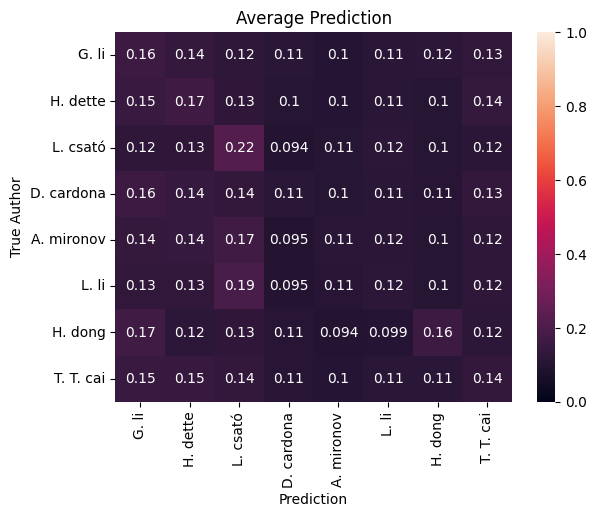

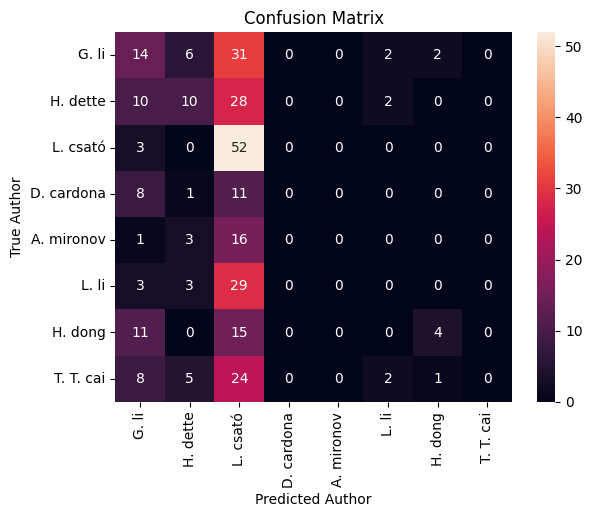

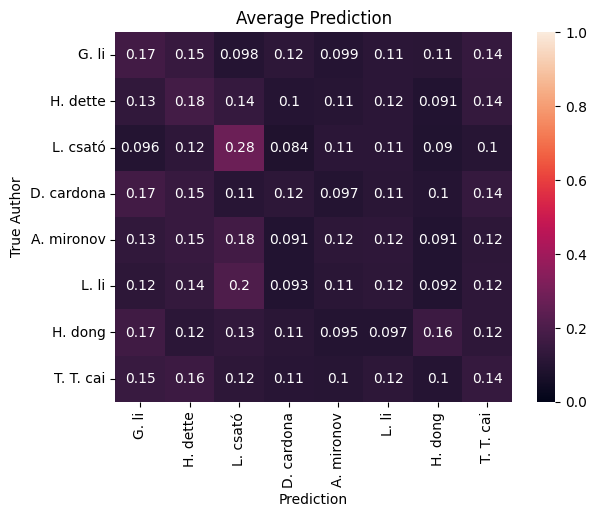

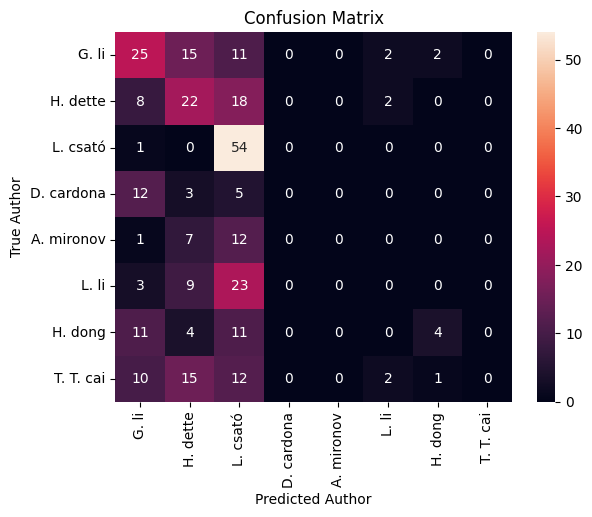

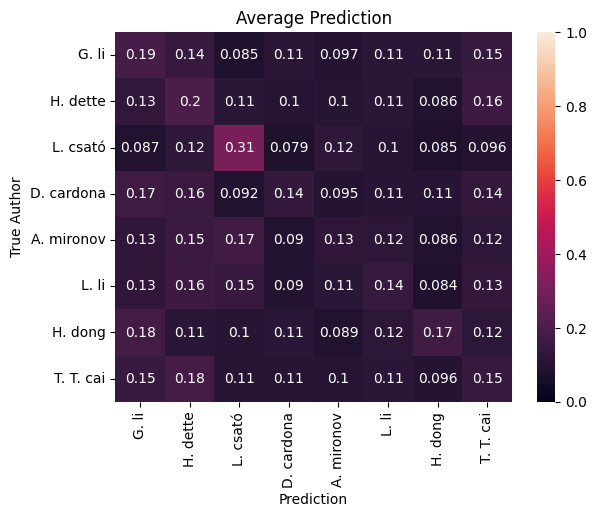

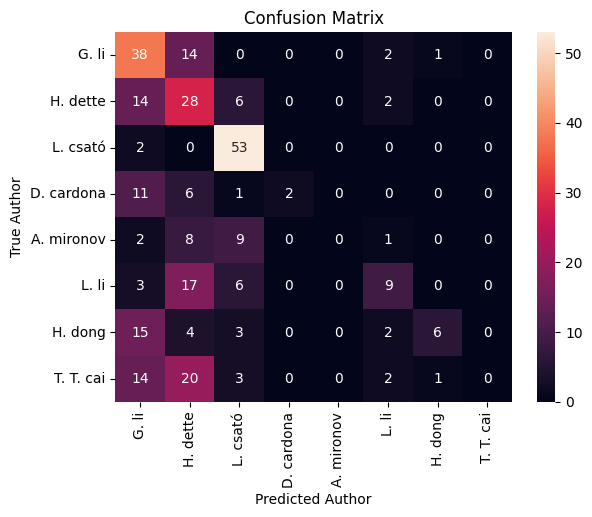

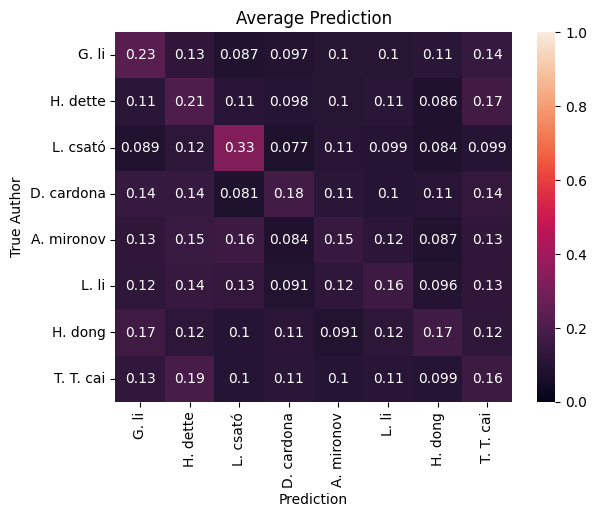

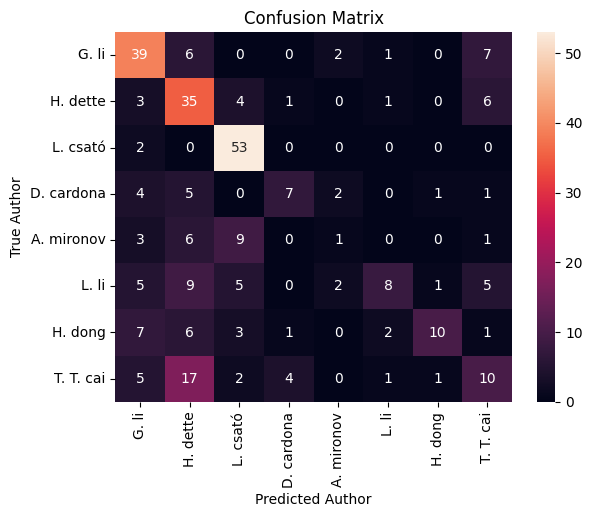

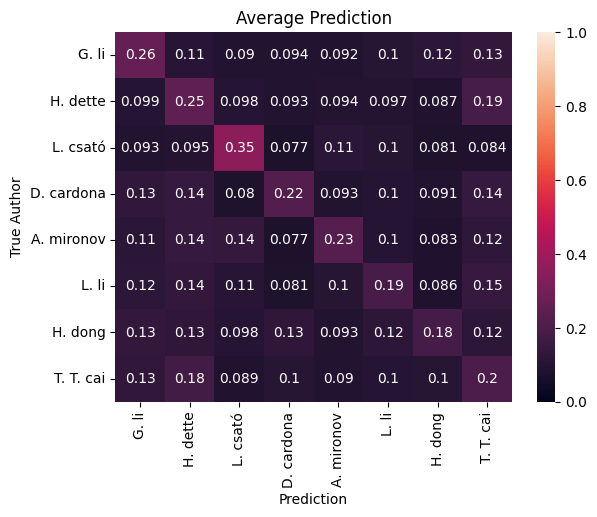

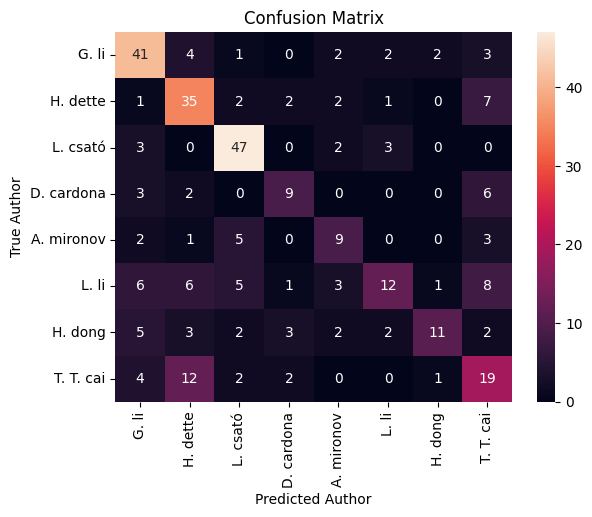

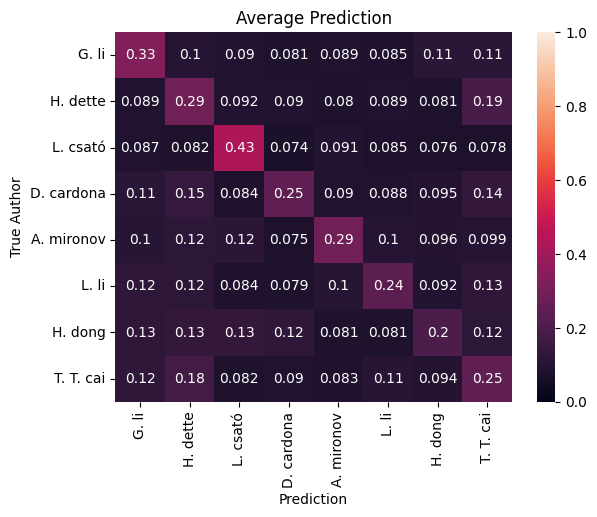

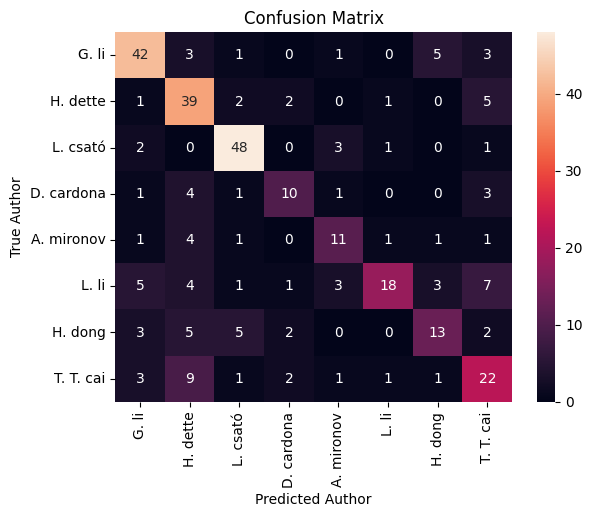

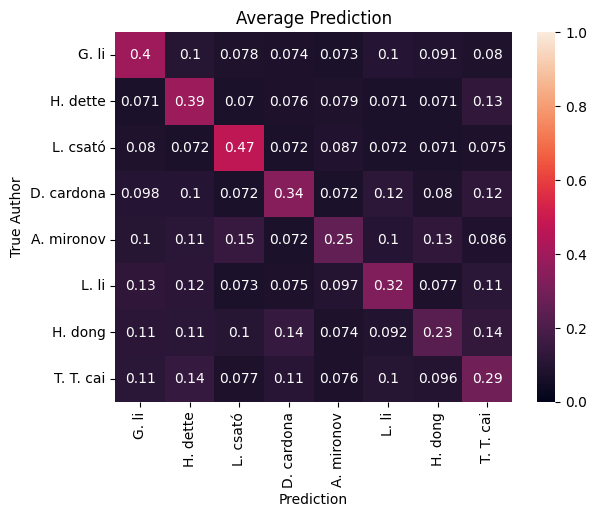

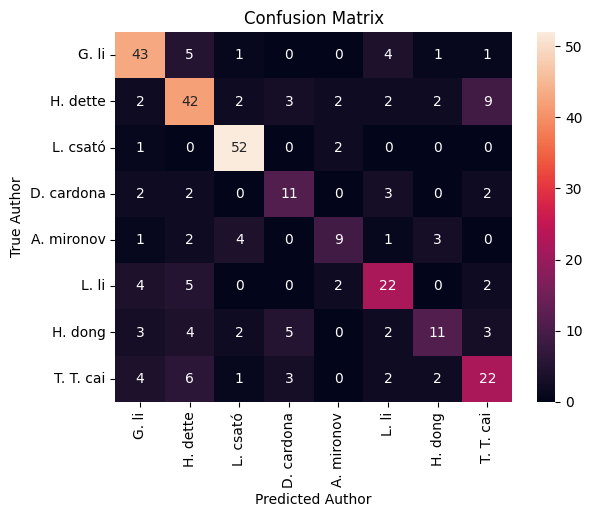

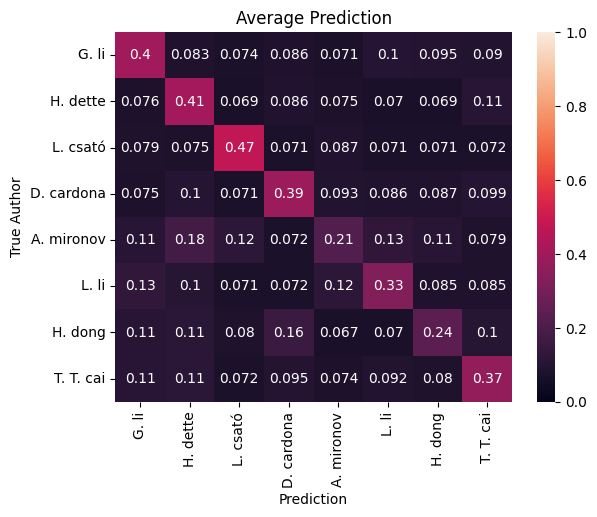

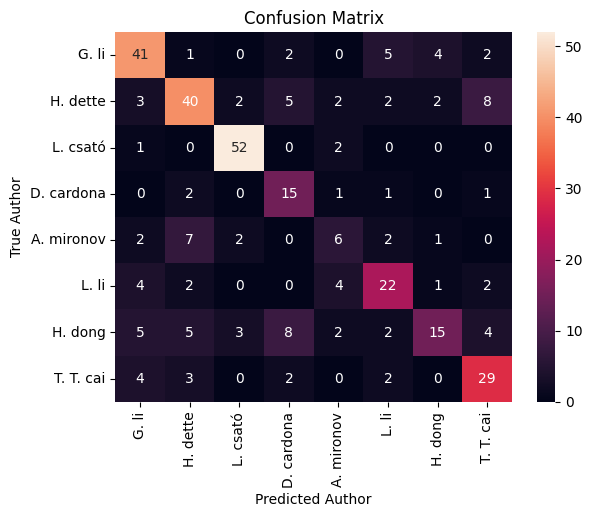

In [5]:
(predictions_general, 
 performances_general, 
 feature_selection_ratios_general, 
 feature_selection_dfs_general, 
 feature_selection_stdev_dfs_general,
 balanced_precisions) = analysis.pipeline_wrapper(root_folders[0], feature_select_nums=[2,3,5,8,13,21,55,89])

## Feature Selection Analysis

In [24]:
from src.plotting import plot_precision_progression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

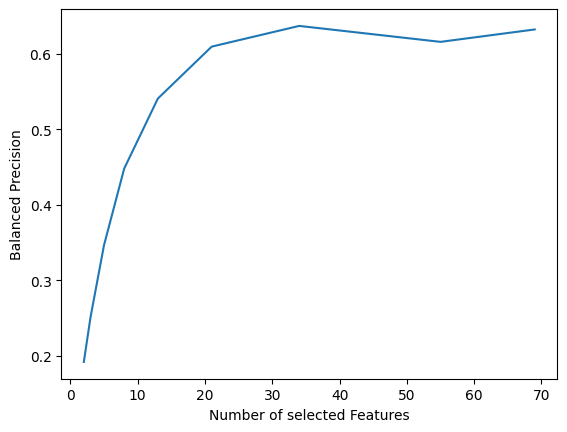

In [25]:
balanced_precision_list = []
feature_selection_nums = []
for key in performances_general.keys():
    if key > 34:
        balanced_precision_list.append(balanced_precisions_34["first_author"])
        feature_selection_nums.append(34)
    conf_mat = performances_general[key]["first_author"]
    balanced_precision = analysis.get_balanced_acc(conf_mat)
    balanced_precision_list.append(balanced_precision)
    feature_selection_nums.append(min([69, key]))
save_location = root_folders[0] + "accuracy_progression.png"
data = np.vstack([np.array(balanced_precision_list), np.array(feature_selection_nums)]).T
data_df = pd.DataFrame(data=data, index=range(data.shape[0]), columns=["prec_vals", "num_feats"])
ax = sns.lineplot(data=data_df, x="num_feats", y="prec_vals")
ax.set_xlabel("Number of selected Features")
ax.set_ylabel("Balanced Precision")
plt.savefig(save_location, dpi=150, bbox_inches='tight')
plt.show()

In [41]:
def magnify():
    return [
        {"selector": "th", "props": [("font-size", "4pt")]},
        {"selector": "td", "props": [("padding", "0em 0em")]},
        {"selector": "th:hover", "props": [("font-size", "12pt")]},
        {
            "selector": "tr:hover td:hover",
            "props": [("max-width", "200px"), ("font-size", "12pt")],
        },
    ]

In [42]:
import seaborn as sns

In [43]:
color_palette = sns.color_palette("flare_r", as_cmap=True)
dataframe = feature_selection_dfs_general_34[34]["first_author"]
dataframe.style.background_gradient(cmap=color_palette).set_properties(
    **{"max-width": "80px", "font-size": "1"}
).set_caption("Hover to magnify").format(precision=2).set_table_styles(magnify())

In [32]:
color_palette = sns.color_palette("flare_r", as_cmap=True)
dataframe = feature_selection_dfs_general[89]["first_author"]
dataframe.style.background_gradient(cmap=color_palette).set_properties(
    **{"max-width": "80px", "font-size": "0.5pt"}
).set_caption("Hover to magnify").format(precision=2).set_table_styles(magnify())

## Evaluation under varying Circumstances

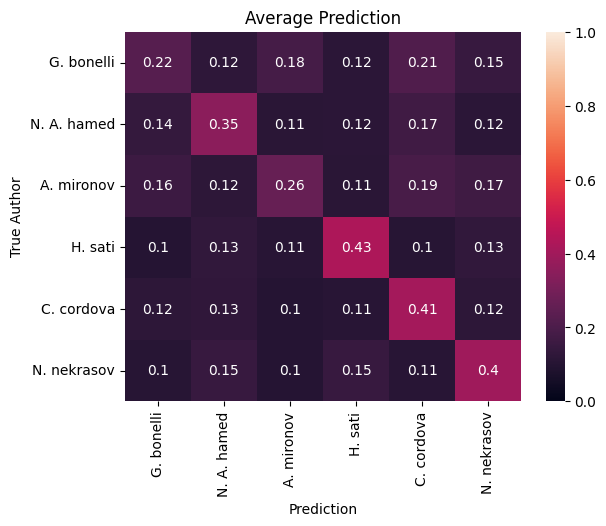

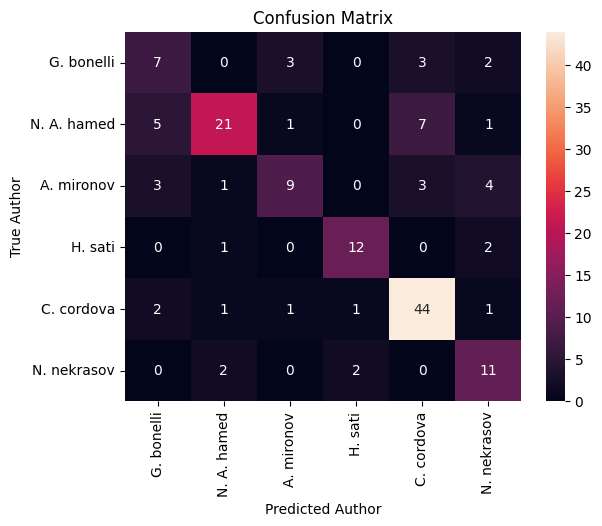

In [33]:
(predictions_cat, 
 performances_cat, 
 feature_selection_ratios_cat, 
 feature_selection_dfs_cat, 
 feature_selection_stdev_dfs_cat,
 balanced_precisions_cat) = analysis.pipeline_wrapper(root_folders[1], feature_select_nums=[34])

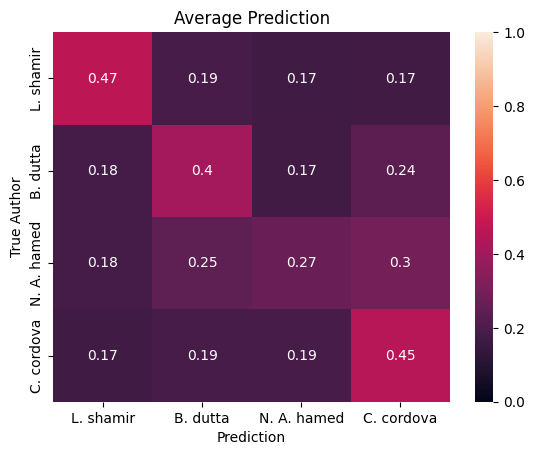

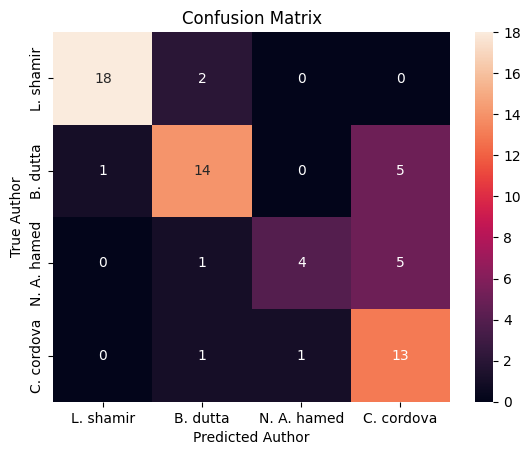

In [34]:
(predictions_nat, 
 performances_nat, 
 feature_selection_ratios_nat, 
 feature_selection_dfs_nat, 
 feature_selection_stdev_dfs_nat,
 balanced_precisions_nat) = analysis.pipeline_wrapper(root_folders[2], feature_select_nums=[34])

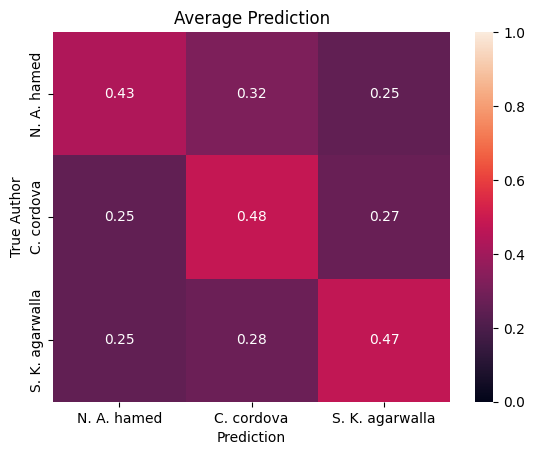

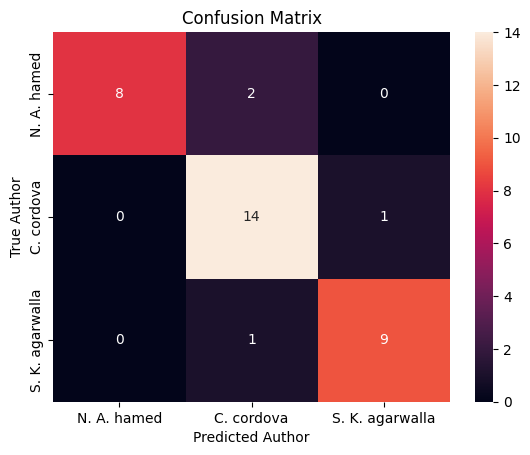

In [57]:
# TODO: rerun with larger feature_select_num size now that the (hacky) workaround is in place
(predictions_ven, 
 performances_ven, 
 feature_selection_ratios_ven, 
 feature_selection_dfs_ven, 
 feature_selection_stdev_dfs_ven,
 balanced_precisions_ven) = analysis.pipeline_wrapper(root_folders[3], feature_select_nums=[21])

In [ ]:
# TODO: run once the kernel was restarted, since the min group size was reduced to 5 (hopefully that means we get any data)
# 5 is the min group size however due to crossval split
(predictions_year, 
 performances_year, 
 feature_selection_ratios_year, 
 feature_selection_dfs_year, 
 feature_selection_stdev_dfs_year,
 balanced_precisions_year) = analysis.pipeline_wrapper(root_folders[4], feature_select_nums=[34])

KeyboardInterrupt: 

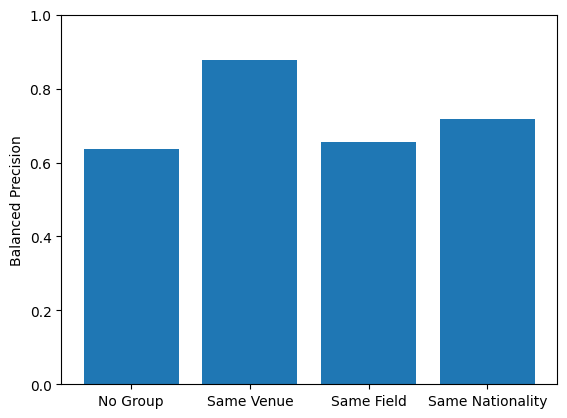

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

precisions = [balanced_precisions_34["first_author"], balanced_precisions_ven["first_author"], balanced_precisions_cat["first_author"], balanced_precisions_nat["first_author"]]
datasets = ["No Group", "Same Venue", "Same Field", "Same Nationality"]

ax = plt.bar(datasets, precisions)
plt.ylabel("Balanced Precision")
plt.ylim(0, 1)
plt.savefig("./data/mini-datasets/Performance_comparison.png", dpi=150, bbox_inches='tight')
plt.show()